In [111]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics

# **Linear Regression Model to Predict 2023/24 Season's xGD**

In [112]:
final_df = pd.read_csv("Final_Data.csv")
final_df

,Unnamed: 0,Year,Position,Team,Points,xG,xGA,xGD,xGD/90,Average_Market_Value,Total_Market_Value,Normalized_Market_Value
0,0,2022,1,manchester city,89,78.6,32.1,46.5,1.22,33.70,1150.00,1.000000
1,1,2022,2,arsenal fc,84,71.9,42.0,29.9,0.79,23.83,1000.00,0.869565
2,2,2022,3,manchester united,75,67.7,50.4,17.3,0.45,17.67,848.00,0.737391
3,3,2022,4,newcastle united,71,72.0,39.6,32.4,0.85,14.25,541.60,0.470957
4,4,2022,5,liverpool fc,67,72.6,50.9,21.7,0.57,20.82,811.85,0.705957
...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,2017,16,huddersfield town,37,31.3,48.5,-17.2,-0.45,3.03,106.05,0.105000
116,116,2017,17,southampton fc,36,39.9,45.2,-5.3,-0.14,10.24,297.00,0.294059
117,117,2017,18,swansea city,33,31.6,58.6,-27.0,-0.71,4.60,165.49,0.163851
118,118,2017,19,stoke city,33,36.5,62.5,-26.0,-0.69,5.50,192.45,0.190545


In [113]:
xgd_df = final_df.drop(columns=["Unnamed: 0", "Position", "Points", "xG", "xGA", "xGD/90", "Average_Market_Value", "Total_Market_Value", "Normalized_Market_Value"])
xgd_df

,Year,Team,xGD
0,2022,manchester city,46.5
1,2022,arsenal fc,29.9
2,2022,manchester united,17.3
3,2022,newcastle united,32.4
4,2022,liverpool fc,21.7
...,...,...,...
115,2017,huddersfield town,-17.2
116,2017,southampton fc,-5.3
117,2017,swansea city,-27.0
118,2017,stoke city,-26.0


If the standard deviation of the team's data is <10, then lets fit a linear regression model and if the standard deviation of the team's data is >10, then lets fit a quadratic model with a degree of 2. 

In [114]:
final_df["Team"].unique()

array(['manchester city', 'arsenal fc', 'manchester united',
       'newcastle united', 'liverpool fc', 'brighton & hove albion',
       'aston villa', 'tottenham hotspur', 'brentford fc', 'fulham fc',
       'crystal palace', 'chelsea fc', 'wolverhampton wanderers',
       'west ham united', 'afc bournemouth', 'nottingham forest',
       'everton fc', 'leicester city', 'leeds united', 'southampton fc',
       'burnley fc', 'watford fc', 'norwich city', 'west bromwich albion',
       'sheffield united', 'cardiff city', 'huddersfield town',
       'swansea city', 'stoke city'], dtype=object)

In [115]:
final_df["Team"].unique()

array(['manchester city', 'arsenal fc', 'manchester united',
       'newcastle united', 'liverpool fc', 'brighton & hove albion',
       'aston villa', 'tottenham hotspur', 'brentford fc', 'fulham fc',
       'crystal palace', 'chelsea fc', 'wolverhampton wanderers',
       'west ham united', 'afc bournemouth', 'nottingham forest',
       'everton fc', 'leicester city', 'leeds united', 'southampton fc',
       'burnley fc', 'watford fc', 'norwich city', 'west bromwich albion',
       'sheffield united', 'cardiff city', 'huddersfield town',
       'swansea city', 'stoke city'], dtype=object)

In [116]:
def get_xgd(team):
    team_df = xgd_df[xgd_df['Team'] == team]
    team_df

    team_std_dev = team_df['xGD'].std()
    print("Standard Deviation: ", team_std_dev)

    next_years_xgd = -1
    if(True):#team_std_dev < 10.0):
        #Creating the Linear Regression Model
        x = team_df['Year']
        y = team_df['xGD']

        x = x.values.reshape(-1,1)
        y = y.values.reshape(-1,1)

        lm = LinearRegression()
        lm.fit(x, y)

        #Testing the Model
        predictions = lm.predict(x)
        next_years_xgd = lm.predict([[2023]])

        plt.scatter(x, y, color = 'purple')
        plt.plot(x, predictions, color = 'green', linewidth = 3)
        plt.title("")
        plt.show

    else: 
        x = team_df['Year']
        y = team_df['xGD']

        x = x.values.reshape(-1,1)
        y = y.values.reshape(-1,1)

        poly = PolynomialFeatures(degree=2, include_bias=False)
        poly_features = poly.fit_transform(x)
        poly_reg_model = LinearRegression()
        poly_reg_model.fit(poly_features, y)

        y_predicted = poly_reg_model.predict(poly_features)

        predictions = poly_reg_model.predict(poly_features)

        poly23 = poly_features = poly.fit_transform([[2023]])
        next_years_xgd = poly_reg_model.predict(poly23)

        plt.scatter(x, y, color = 'purple')
        plt.plot(x, y_predicted, color = 'green', linewidth = 3)
        plt.title("")
        plt.show
    return next_years_xgd[0][0]
    print(team + "'s predicted 2023/24 xGD: " + str(next_years_xgd[0][0]))


# **Multi Linear Regression Model**

Mean Absolute Error: 4.94321902351773


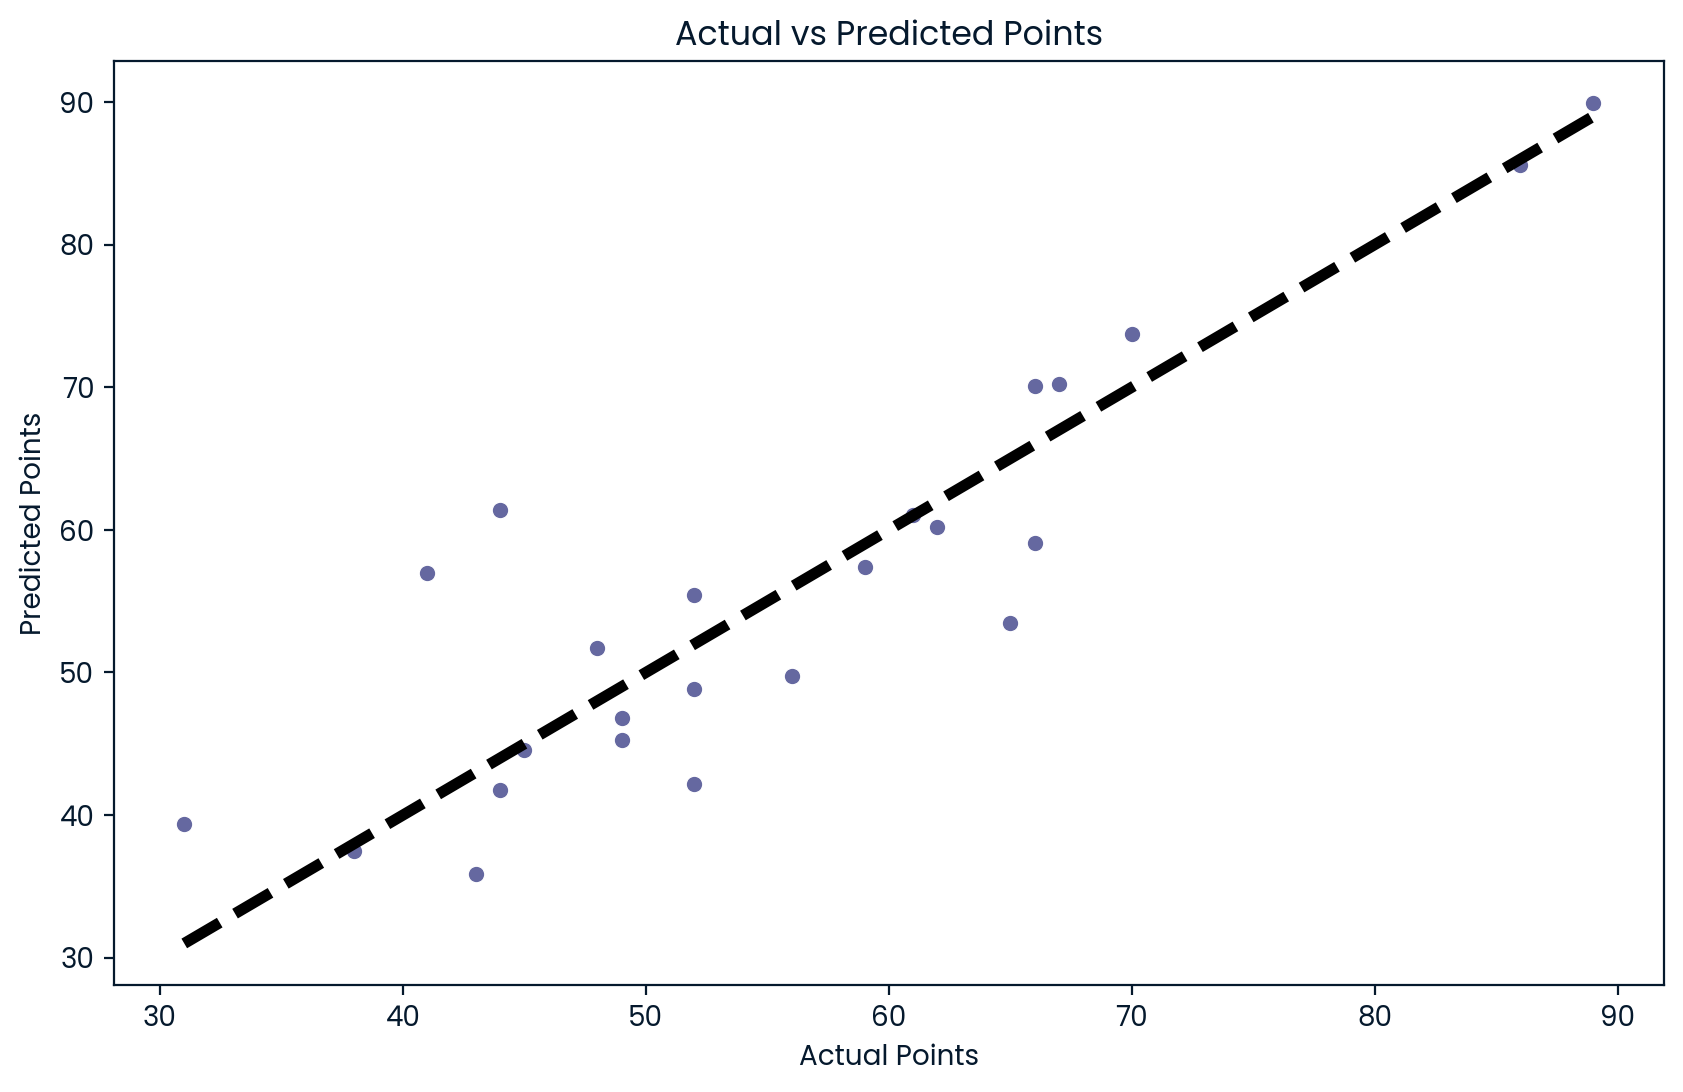

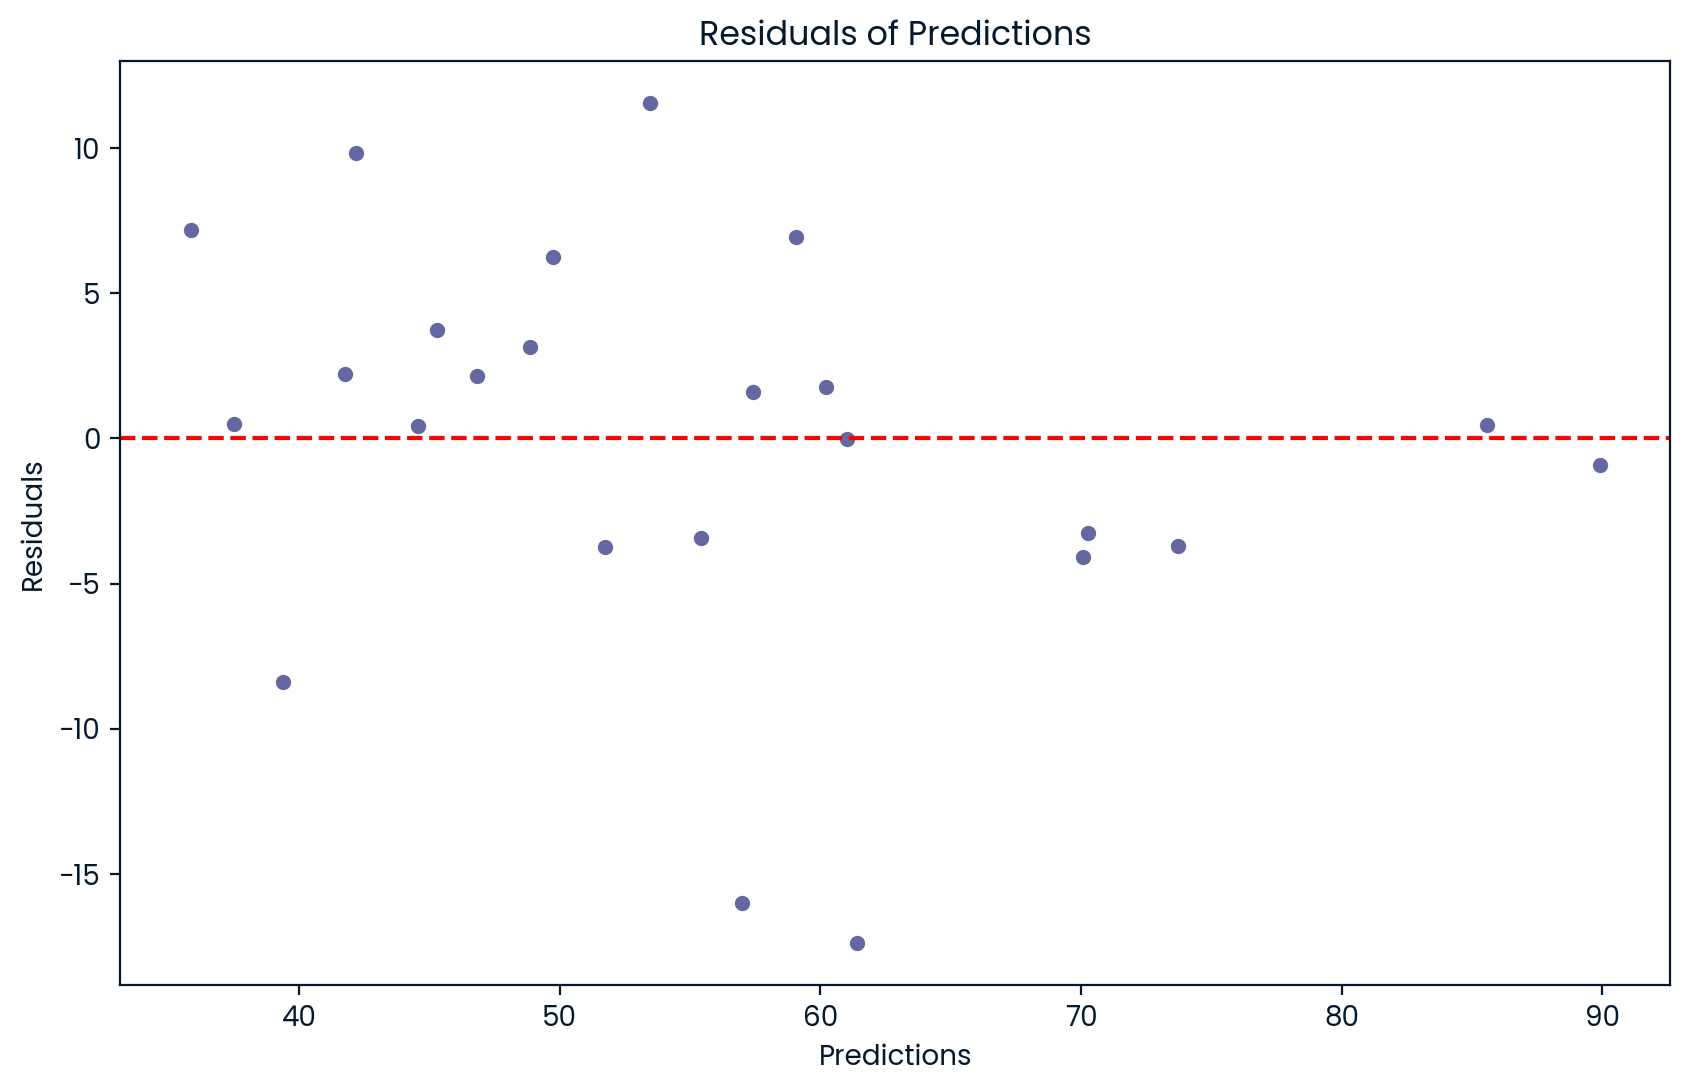

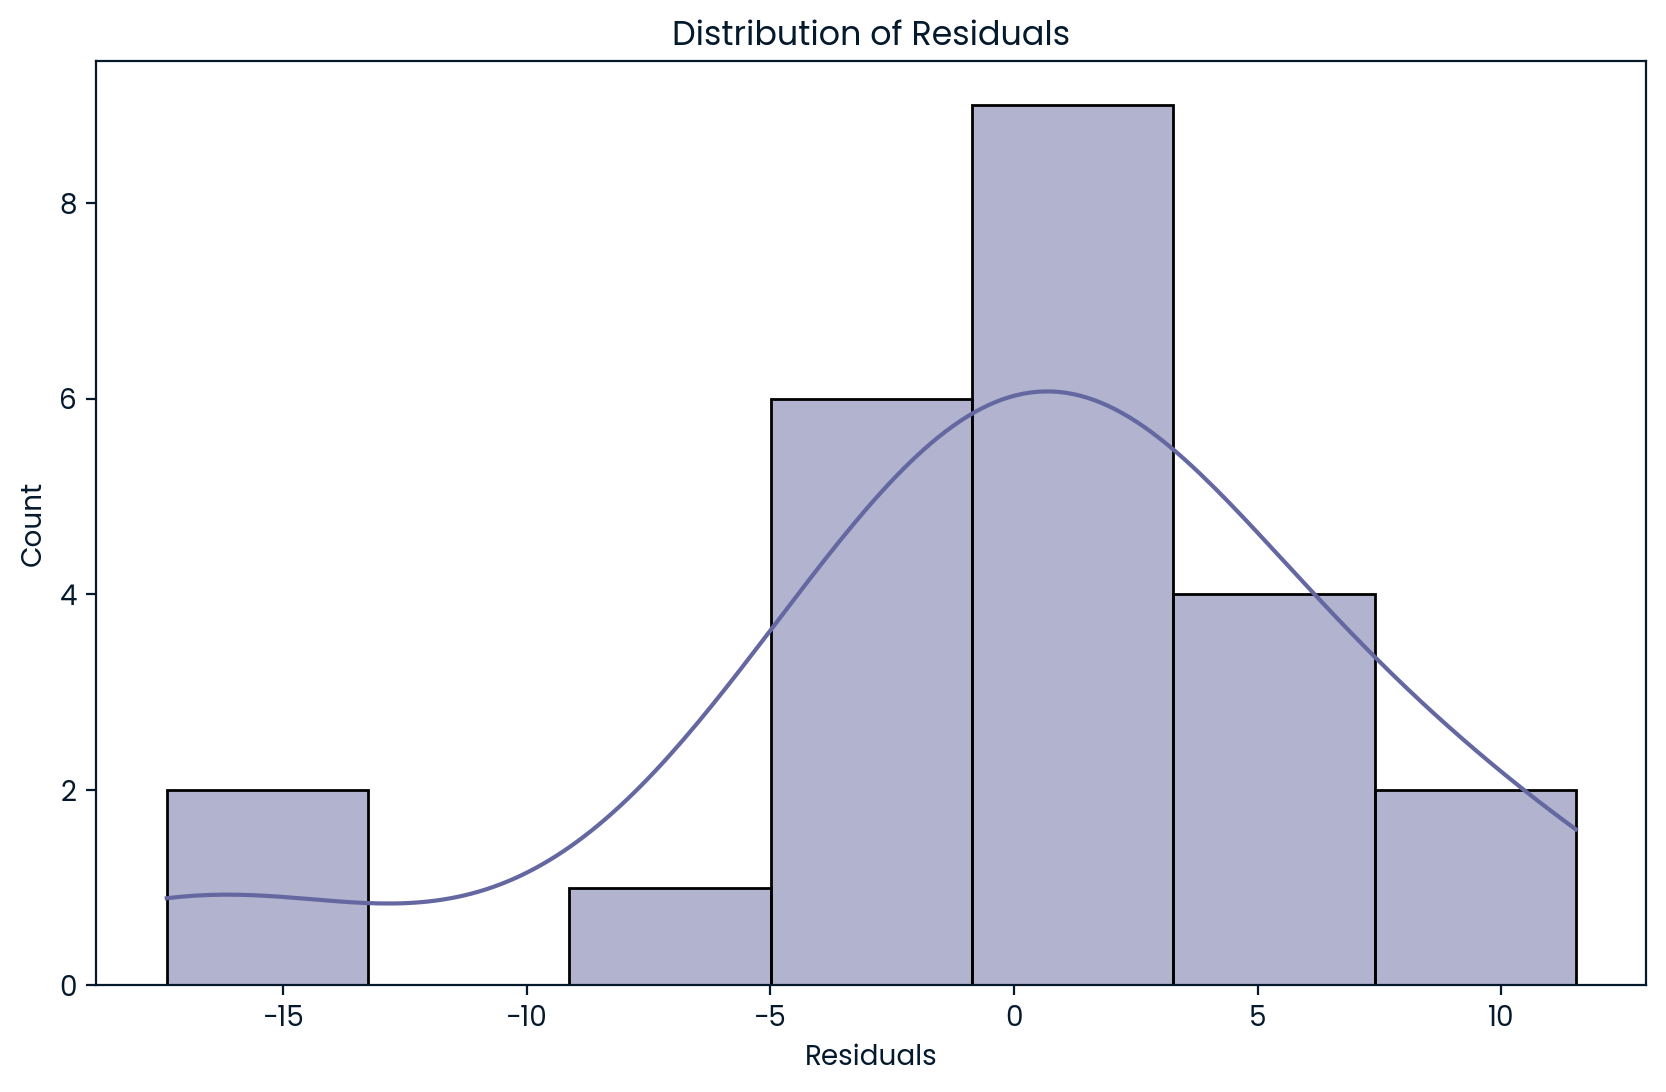

In [117]:
# Load the dataset
data = pd.read_csv('Final_Data.csv')

# Selecting the features and target variable
features = ['xGD', 'Normalized_Market_Value']
X = data[features]
y = data['Points']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Creating the model
multi_lin_reg_model = LinearRegression()

# Fitting the model
multi_lin_reg_model.fit(X_train, y_train)

# Making predictions
predictions = multi_lin_reg_model.predict(X_test)

# Calculating the MAE
mae = metrics.mean_absolute_error(y_test, predictions)

# Displaying the metrics
print(f"Mean Absolute Error: {mae}")

# Visualization
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs Predicted Points')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

# Residuals plot
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals of Predictions')
plt.show()

# Distribution of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

# **Putting It All Together!**

In [118]:
x = final_df["Team"].unique()
x

array(['manchester city', 'arsenal fc', 'manchester united',
       'newcastle united', 'liverpool fc', 'brighton & hove albion',
       'aston villa', 'tottenham hotspur', 'brentford fc', 'fulham fc',
       'crystal palace', 'chelsea fc', 'wolverhampton wanderers',
       'west ham united', 'afc bournemouth', 'nottingham forest',
       'everton fc', 'leicester city', 'leeds united', 'southampton fc',
       'burnley fc', 'watford fc', 'norwich city', 'west bromwich albion',
       'sheffield united', 'cardiff city', 'huddersfield town',
       'swansea city', 'stoke city'], dtype=object)

In [119]:
normalized_23_24 = {
"manchester city" : 1027/1027,
"arsenal fc" : 1012/1027,
"chelsea fc" : 928.30/1027,
"liverpool fc" : 921.40/1027,
"tottenham hotspur" : 777.30/1027,
"manchester united" : 734.25/1027,
"aston villa" : 646.20/1027,
"newcastle united" : 637.70/1027,
"brighton & hove albion" : 505.10/1027,
"west ham united" : 446.60/1027,
"brentford fc" : 426.08/1027,
"crystal palace" : 404.70/1027,
"nottingham forest" : 369.65/1027,
"afc bournemouth" : 352.80/1027,
"everton fc" : 345.40/1027,
"wolverhampton wanderers" : 339.90/1027,
"fulham fc" : 338.00/1027,
"burnley fc" : 256.10/1027,
"sheffield united" : 144.20/1027,
"luton town" : 125.10/1027}

Enter a team name: arsenal fc
Standard Deviation:  13.11941309662898
arsenal fc's normalized market value for 2023/24 is: 0.98539435248296


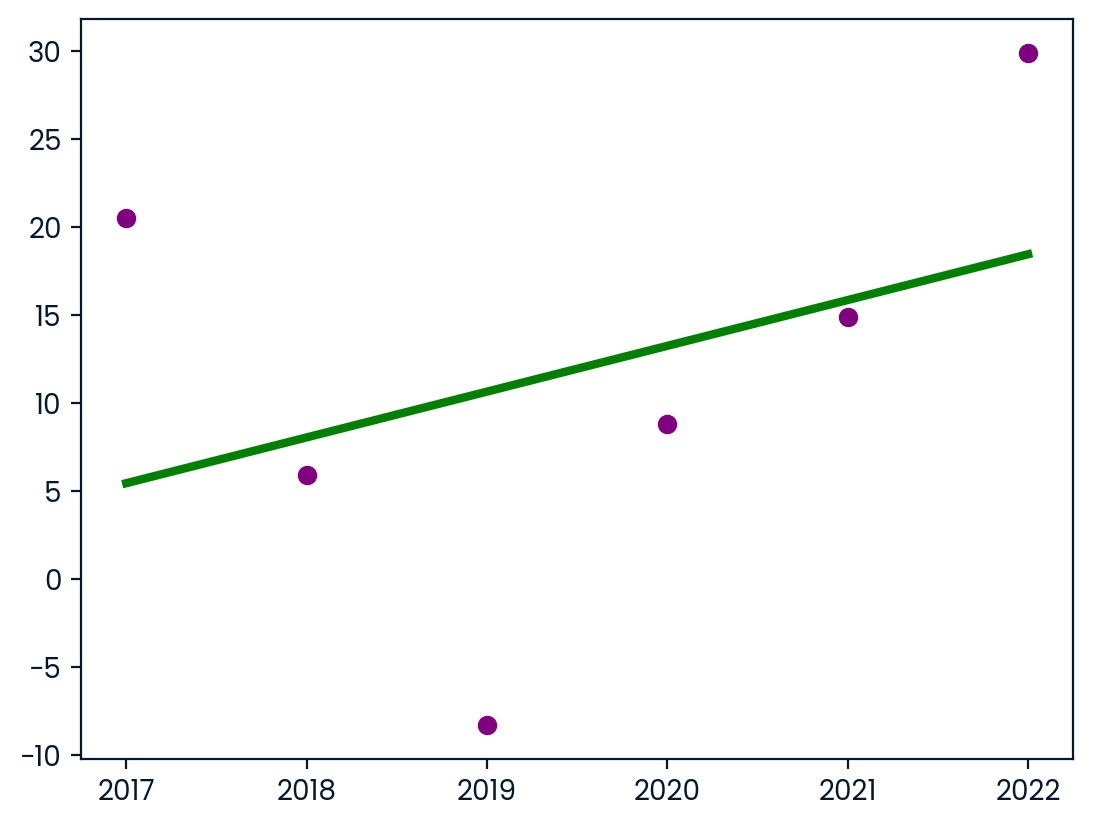

In [120]:
team = input("Enter a team name: ")
predicted_xgd = get_xgd(team)
market_value = normalized_23_24[team]
print(team + "'s normalized market value for 2023/24 is: " + str(market_value))

In [122]:
# Predicting with a new data point
new_data = pd.DataFrame({'xGD': [predicted_xgd], 'Normalized_Market_Value': [market_value]})
new_prediction = multi_lin_reg_model.predict(new_data)

# Displaying the prediction for the new data point
new_prediction

array([76.54668774])